In [29]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [30]:
def compose_circuit(function: QuantumCircuit):
    """
    Compose a new circuit with the oracle and a circuit
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    
    qc.barrier()
    
    qc.compose(function, inplace=True)

    qc.barrier()

    qc.h(range(n))

    qc.measure(range(n), range(n))

    return qc

In [45]:
def dj_algorithm(function: QuantumCircuit):
    """
    Finds if an the oracle is constant or balanced
    """
    qc = compose_circuit(function)

    display(qc.draw(output='mpl'))

    result = AerSimulator().run(qc, shots=500, memory=True).result()
    measurements = result.get_memory()
    
    print(measurements)

    if "1" in measurements[0]:
        return "Balanced oracle"
    else:        
        return "Constant oracle"

In [46]:
def constant_oracle():
    qc = QuantumCircuit(4)
    qc.x(3)

    return qc

In [49]:
def balanced_oracle():
    qc = QuantumCircuit(4)
    qc.x([0, 1, 2])
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.x([0, 1, 2])

    return qc

Constant oracle:


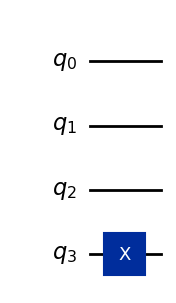

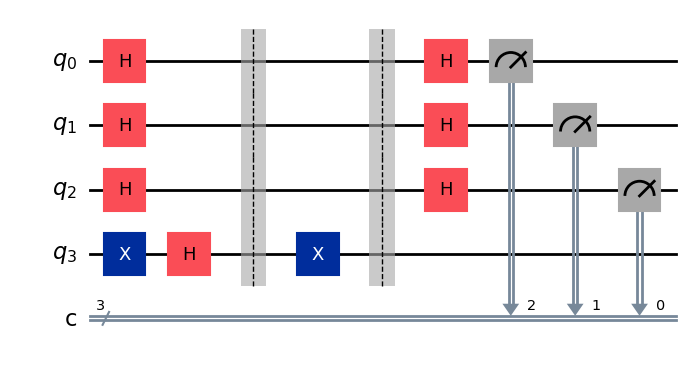

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

'Constant oracle'

In [50]:
f_constant = constant_oracle()

print("Constant oracle:")
display(f_constant.draw("mpl"))
display(dj_algorithm(f_constant))


Balanced oracle:


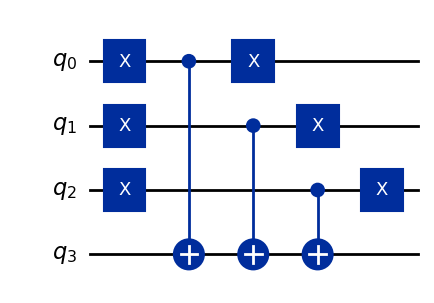

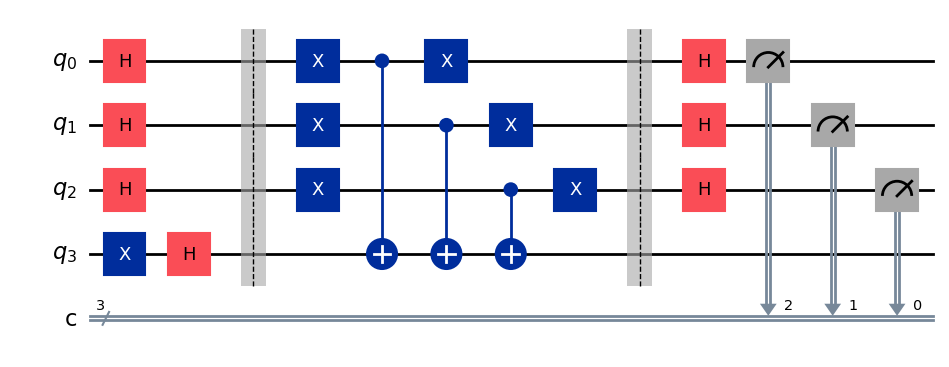

['111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111'

'Balanced oracle'

In [51]:
f_balanced = balanced_oracle()
print("\nBalanced oracle:")
display(f_balanced.draw("mpl"))
display(dj_algorithm(f_balanced))

In [52]:
def other_balanced_oracle():
    qc = QuantumCircuit(4)
    qc.cx(0, 3)  # CNOT con qubit 0 como control y qubit 3 como objetivo
    return qc


Balanced oracle:


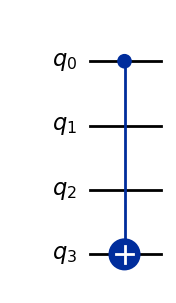

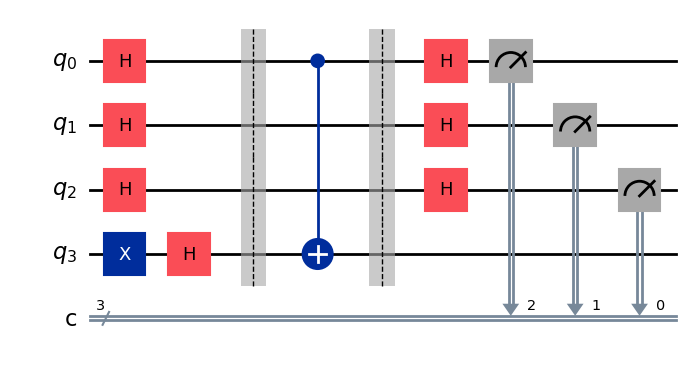

['100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100'

'Balanced oracle'

In [53]:
f_balanced = other_balanced_oracle()
print("\nBalanced oracle:")
display(f_balanced.draw("mpl"))
display(dj_algorithm(f_balanced))

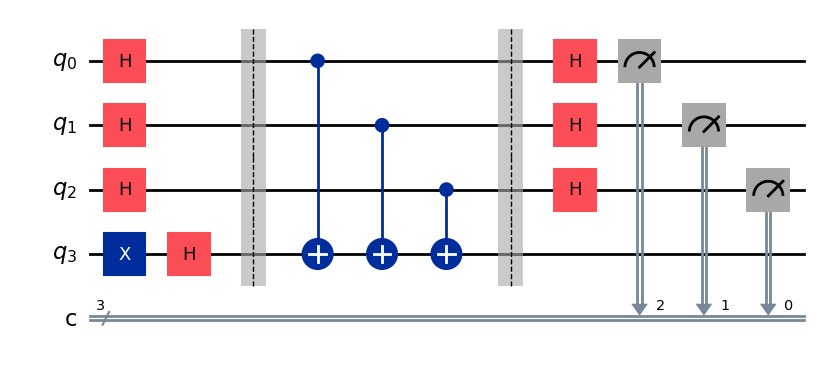

['111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111'

In [54]:
def varied_balanced_oracle():
    qc = QuantumCircuit(4)
    qc.cx(0, 3)  # CNOT con qubit 0 como control y qubit 3 como objetivo
    qc.cx(1, 3)  # CNOT con qubit 1 como control y qubit 3 como objetivo
    qc.cx(2, 3)  # CNOT con qubit 2 como control y qubit 3 como objetivo
    return qc

# Uso del oráculo en el algoritmo de Deutsch-Jozsa
result = dj_algorithm(varied_balanced_oracle())
print(result)

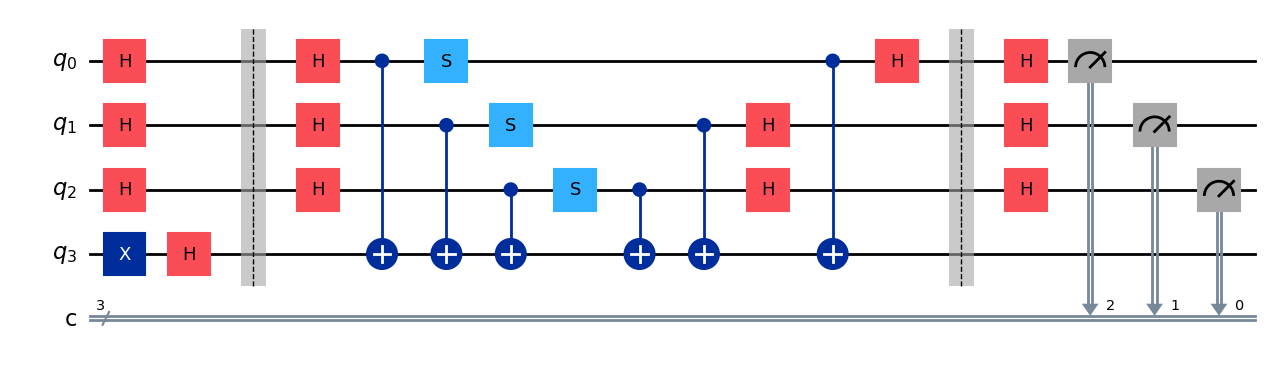

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

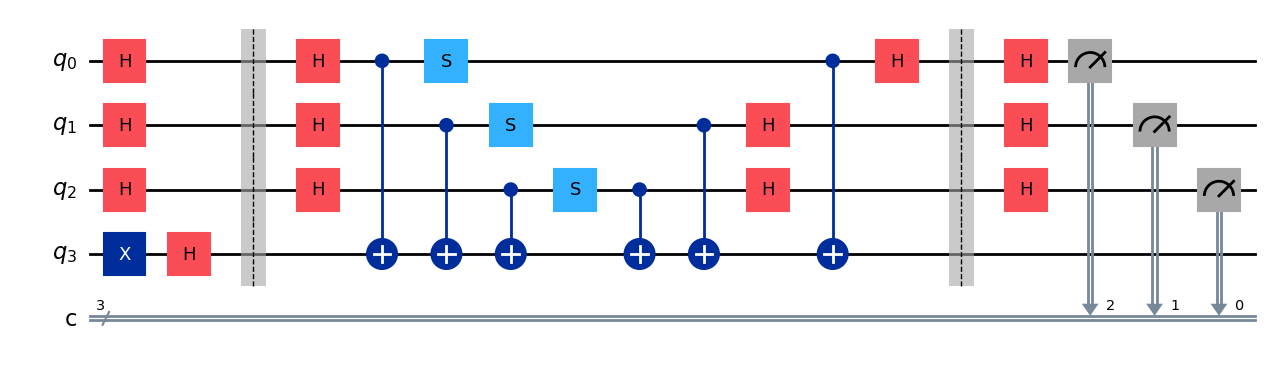

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

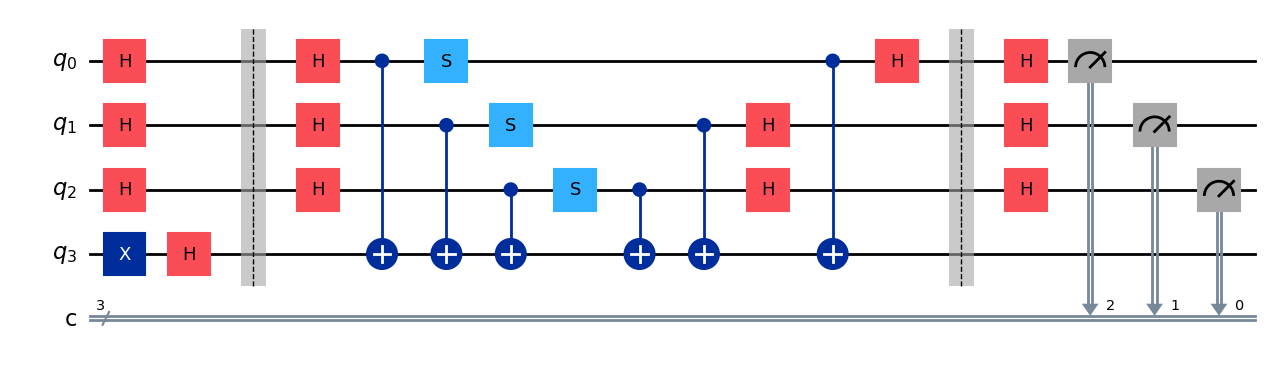

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

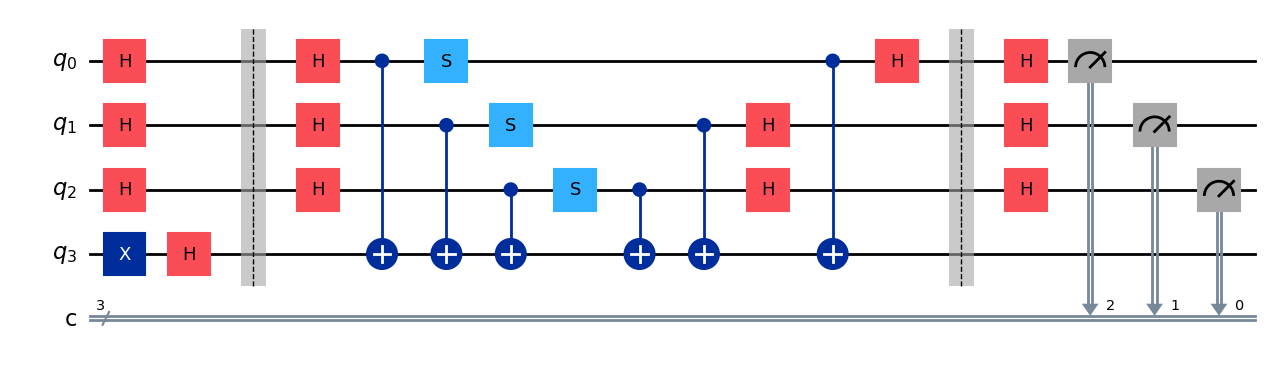

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

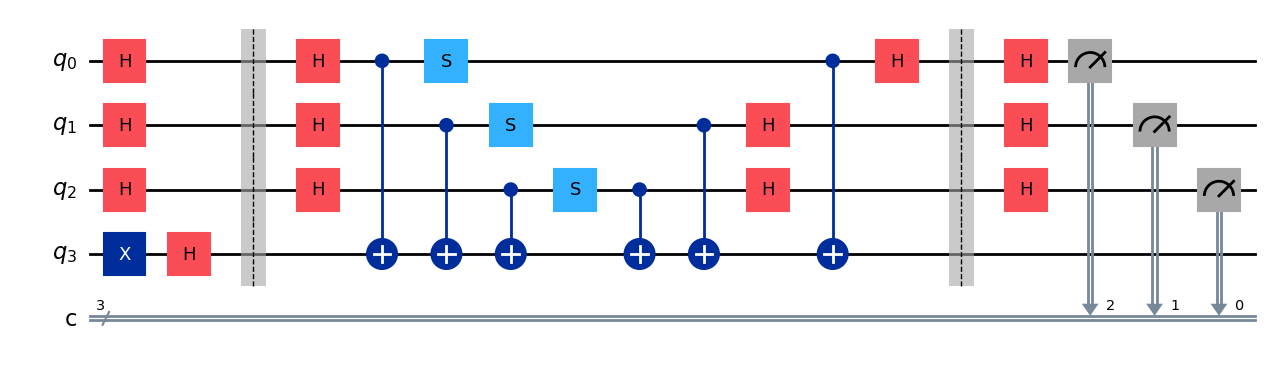

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

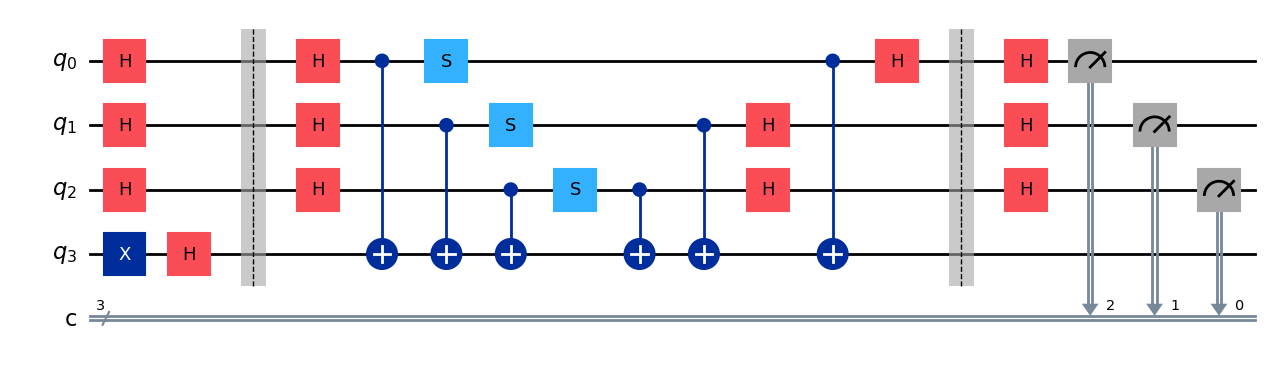

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

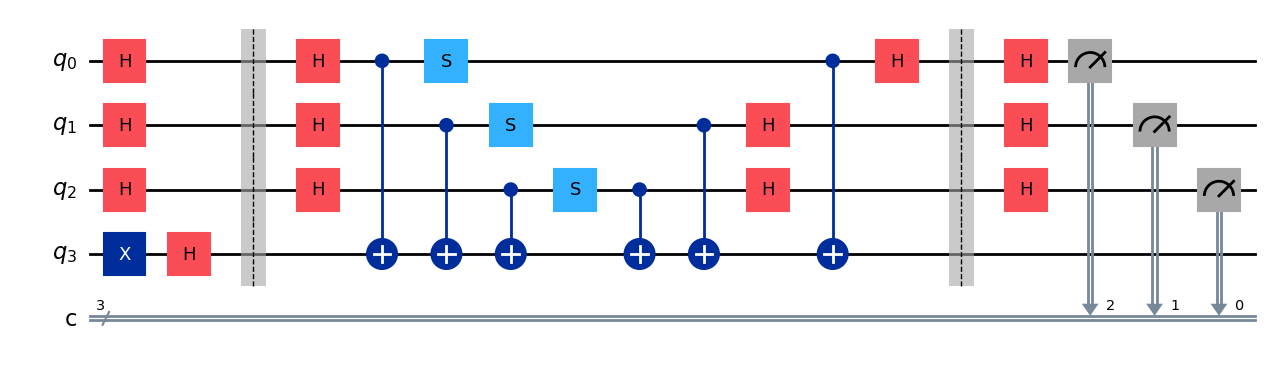

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

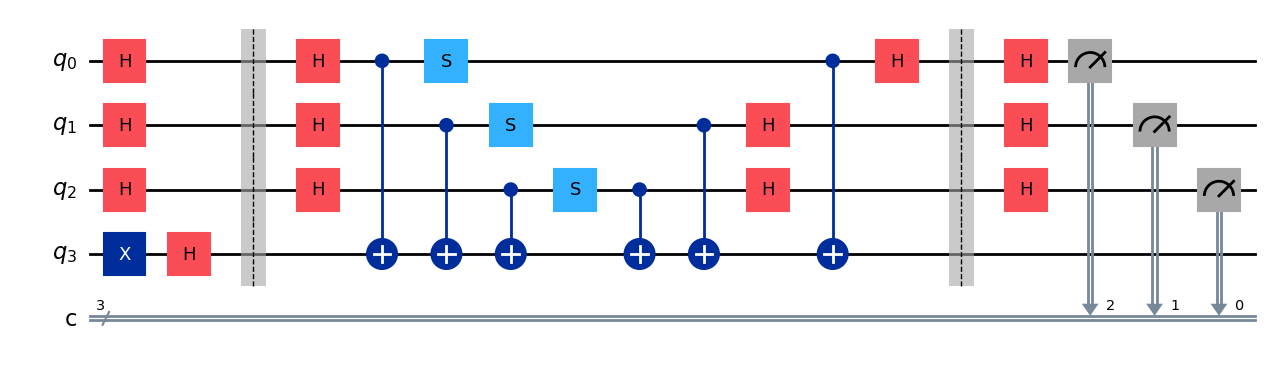

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

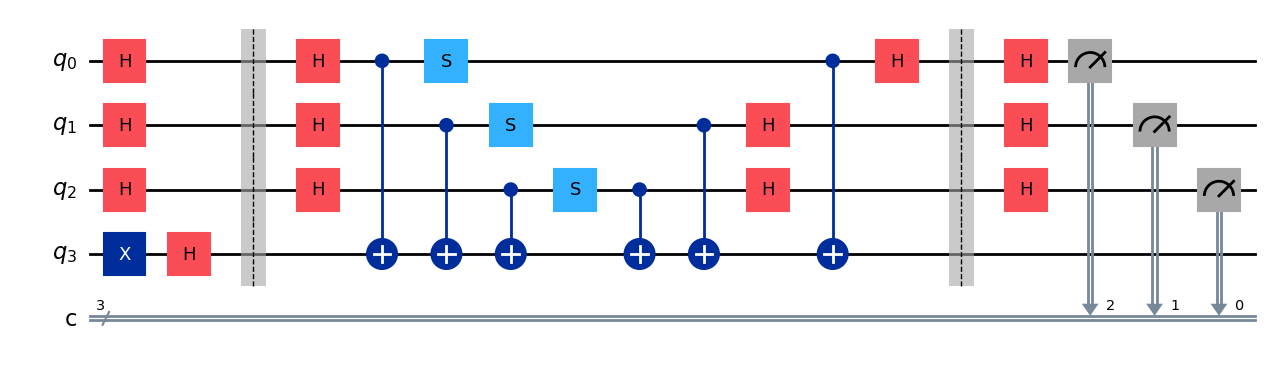

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

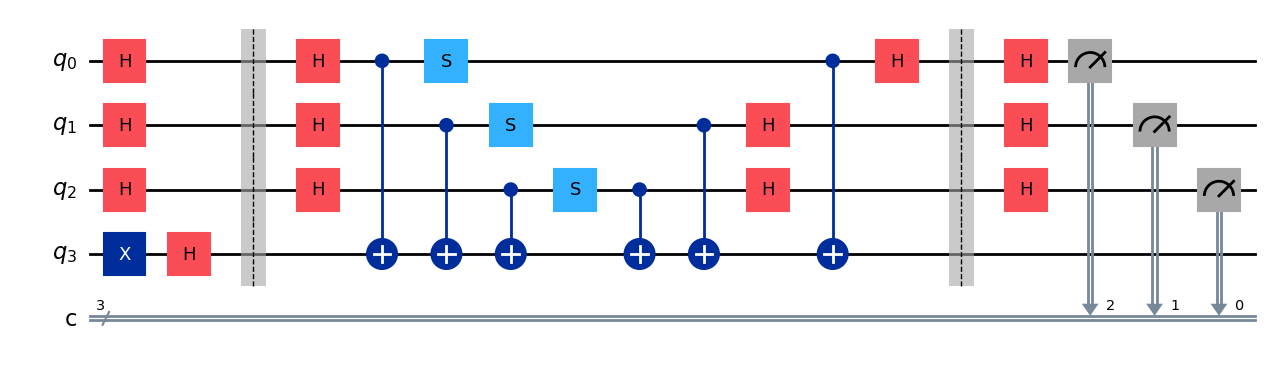

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

In [55]:
def random_balanced_oracle():
    qc = QuantumCircuit(4)
    
    # Aplicar puertas H a los qubits de entrada
    qc.h([0,1,2])
    
    # Aplicar CNOTs en diferentes configuraciones
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    
    # Aplicar puertas de fase S a los qubits de entrada
    qc.s([0,1,2])
    
    # Aplicar más CNOTs en orden diferente
    qc.cx(2, 3)
    qc.cx(1, 3)
    qc.cx(0, 3)
    
    # Aplicar puertas H de nuevo a los qubits de entrada
    qc.h([0,1,2])
    
    return qc

# Uso del oráculo en el algoritmo de Deutsch-Jozsa
def test_random_oracle():
    oracle = random_balanced_oracle()
    for _ in range(10):  # Ejecutar 10 veces para ver la variabilidad
        result = dj_algorithm(oracle)
        print(result)

test_random_oracle()